## Data Cleaning and Preprocessing Notebook

This notebook is to be strictly used for data cleaning and preprocessing purposes. Steps:

1. Read the dataset
2. Handle Missing Values (if any).
3. Do visualizations as required
4. Explore your data here
5. Save the cleaned and processed dataset as `data/final_dataset.csv`.
6. Split the dataset obtained in step 5 as `input/train.csv`,`input/test.csv`,`input/validation.csv`

NO MODELLING WILL BE DONE IN THIS NOTEBOOK!

In [23]:
from scipy.io import wavfile
from scipy.signal import spectrogram
import numpy as np
import librosa.display
import pandas as pd
import matplotlib.pyplot as plt
from librosa.feature import mfcc
import librosa
import soundfile as sf

In [24]:
PATH='../data/genres_original/'

In [25]:
samplerate, data=wavfile.read("../data/genres_original/classical/0Gef573AJfARbMuQSoCy2r.wav")

In [26]:
data=np.mean(data,axis=1)

Shape of D object: (1025, 1292)


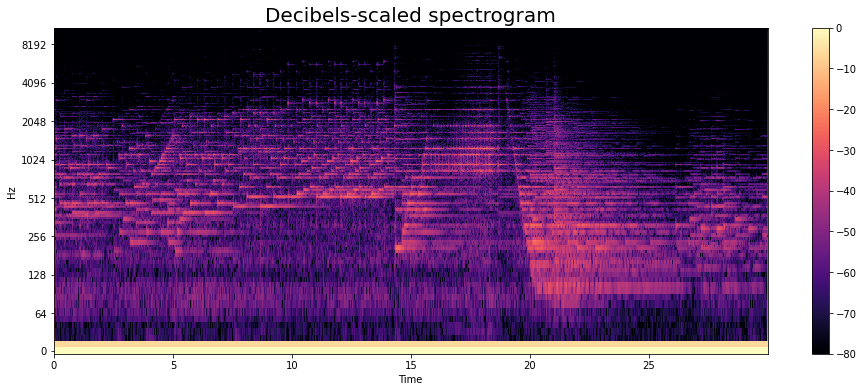

In [28]:
D = np.abs(librosa.stft(data, n_fft=2048, hop_length=512))
print('Shape of D object:', np.shape(D))

# Convert amplitude spectrogram to Decibels-scaled spectrogram.

DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the spectogram.

plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr=samplerate, hop_length=512,
                         x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Decibels-scaled spectrogram', fontsize=20)
plt.show()

In [5]:
def convert_to_mfcc(filepath):
    samplerate,data=wavfile.read(filepath)
    if len(data.shape)==2:
        data=np.mean(data,axis=1)
    start=data.shape[0]//3
    stop=start+data.shape[0]//3
    data=data[start:stop]
    features=mfcc(y=data.astype("float"),n_mfcc=39).T
    return np.mean(features,axis=0)

In [6]:
import os

In [7]:
classes=os.listdir(PATH)

In [8]:
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'metal',
 'pop',
 'reggae',
 'rock']

In [9]:
song_files=[]
mfcc_songs=[]
for c in classes:
    for song in os.listdir(os.path.join(PATH,c)):
        song_path=os.path.join(PATH,c,song)
        print(song)
        song_files.append([song_path,c])
        mfcc_songs.append(convert_to_mfcc(song_path))

09PAOMUiAjZho9HVkd5umo.wav
0Q4ubt0dvVtMcAYwAul0Nl.wav
0QpxUzXEI3ZjJeo6dDFgV7.wav
0t0CvqbxqwtETTajrzqKoW.wav
0v6tG0HoAHiluZAeany7oU.wav
0yBzzceMXi6VMMXGJDqY9A.wav
18PhtDBBYxE0vN4YvsZnMy.wav
1I32D5O8mjfQEglezN4bY0.wav
1i7QbG73o4liXhmbtaT7Z3.wav
1k6zIr7FmCDWBlEGMjkwLb.wav
1MIDCw2NTW3Dtn9c6ohSC8.wav
1nUtE7LNXLGFEJk8kG8gE6.wav
1oG6p5Ue73whPJODUWTuCe.wav
1OGh5aeiGiNvuD37LiNN99.wav
1qHFxjvmKpmwZUcXckLkYc.wav
1ska3YnfMLiOJ6YH7EpZa9.wav
1tsOB58QHINgc2FEJylsLP.wav
2EoSICrErU4WI3QSSu61Xf.wav
2h8nq99nTZQk9H4B63QjVn.wav
2jgHuKeHNfhtYEHwIuc0iJ.wav
2jXrwWE32uQJBi50xCvE9c.wav
2lWTmgOTlemZ0RJyKKhr0s.wav
2NdRldi1OaTHDdTOnTS1Z8.wav
2O7OjNCjqflzWOTVg9UlEm.wav
2Qm98Rw4rdfvo14ZOUiZTN.wav
2T6QJ7Ax9evXGxvGXBC8le.wav
2uSArwKGIy7RKMqIwNyEiN.wav
2wUDhs2MkJGHWFXHZtNmMQ.wav
2z34AUAlDL5ZVjZpCNqwD1.wav
3bhUhdJjutn7jjvkS5jHXH.wav
3BkMv30DKcUEOsRbDSAyIq.wav
3DbVBS8JojEGfuLOZRGgWX.wav
3DjwjAUPT4zvIu6ZzcgLGJ.wav
3gGKOVwsAVvwt9BcH3k18J.wav
3JPC78sNlPaiZ1NgztXW2Q.wav
3LGB6BkiSmzP8IHo03rZMo.wav
3lnavfgHUTrxdRqcPmhqUA.wav
3

In [10]:
mfcc_features=pd.DataFrame(mfcc_songs)

In [11]:
mfcc_features=mfcc_features.add_prefix("mean_mfcc_")

In [12]:
songs=pd.DataFrame(song_files,columns=["filepath","genre"])

In [13]:
dataset=pd.concat([mfcc_features,songs],axis=1)

In [14]:
dataset.to_csv("../data/Song_Data_MFCC.csv",index=False)